In [1]:
import numpy as np
import pandas as pd
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions

In [2]:
import sqlite3

In [371]:
dbname = 'db.sqlite3'
con = sqlite3.connect(dbname)
data_f_o = pd.read_sql('select * from history limit 1200000, 1200000', con)
data_f_o

,id,side,price,size,exec_date,buy_child_order_acceptance_id,sell_child_order_acceptance_id
0,64173711,SELL,767005,0.002000,2017-11-01 23:51:13.840000,JRF20171101-235112-585186,JRF20171101-235113-396717
1,64173714,BUY,767209,0.015547,2017-11-01 23:51:14.653000,JRF20171101-235113-443021,JRF20171101-235105-833740
2,64173715,BUY,767214,0.065302,2017-11-01 23:51:14.653000,JRF20171101-235113-443021,JRF20171101-235106-737105
3,64173716,BUY,767215,1.119151,2017-11-01 23:51:14.653000,JRF20171101-235113-443021,JRF20171101-235055-029051
4,64173725,BUY,767215,0.100000,2017-11-01 23:51:15.497000,JRF20171101-235114-011842,JRF20171101-235055-029051
5,64173728,BUY,767215,0.362092,2017-11-01 23:51:17.373000,JRF20171101-235117-177103,JRF20171101-235055-029051
6,64173729,BUY,767215,1.100000,2017-11-01 23:51:17.373000,JRF20171101-235117-177103,JRF20171101-235115-031687
7,64173730,BUY,767264,0.015547,2017-11-01 23:51:17.373000,JRF20171101-235117-177103,JRF20171101-235103-396596
8,64173731,BUY,767314,0.015548,2017-11-01 23:51:17.373000,JRF20171101-235117-177103,JRF20171101-235106-035465
9,64173732,BUY,767413,0.066902,2017-11-01 23:51:17.373000,JRF20171101-235117-177103,JRF20171101-235116-637524


In [372]:
data_f = data_f_o[['id', 'price', 'size', 'exec_date']]

In [373]:
data_f.exec_date = pd.to_datetime(data_f.exec_date)
data_f = data_f.set_index('id')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [68]:
data_f

,price,size,exec_date
id,,,
56779179,610389,0.079300,2017-10-13 00:24:08.750
56779180,610389,0.001101,2017-10-13 00:24:09.157
56779187,610389,0.200000,2017-10-13 00:24:10.670
56779192,610389,0.031300,2017-10-13 00:24:11.703
56779208,610389,0.056875,2017-10-13 00:24:12.530
56779209,610390,0.583125,2017-10-13 00:24:12.530
56779210,610390,0.400000,2017-10-13 00:24:12.717
56779215,610389,0.010000,2017-10-13 00:24:13.750
56779219,610091,0.173410,2017-10-13 00:24:14.517


In [374]:
data_f = data_f[data_f.exec_date > '2000']

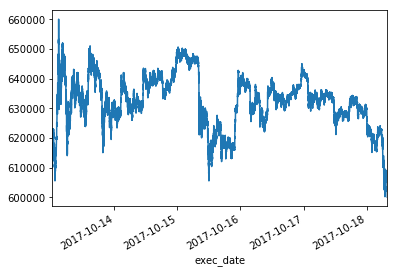

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
data_f.price.plot()

In [375]:
price = data_f.price

In [23]:
price.index[20000], price[20000]

(Timestamp('2017-10-13 03:56:35.543000'), 641900)

In [376]:
answer = price.shift(-10000) / price
answer

id
64173711    1.024765
64173714    1.024493
64173715    1.024768
64173716    1.024002
64173725    1.024155
64173728    1.024224
64173729    1.024764
64173730    1.024699
64173731    1.023896
64173732    1.023960
64173733    1.023958
64173734    1.024384
64173737    1.023945
64173738    1.023910
64173739    1.023911
64173758    1.023216
64173759    1.023536
64173761    1.024194
64173763    1.023648
64173764    1.023284
64173767    1.023151
64173768    1.022933
64173770    1.022946
64173773    1.023051
64173776    1.023038
64173783    1.022944
64173788    1.023817
64173801    1.023294
64173805    1.022890
64173810    1.022685
              ...   
70708638         NaN
70708639         NaN
70708640         NaN
70708641         NaN
70708652         NaN
70708653         NaN
70708655         NaN
70708656         NaN
70708657         NaN
70708663         NaN
70708664         NaN
70708667         NaN
70708668         NaN
70708669         NaN
70708670         NaN
70708671         NaN
70708673  

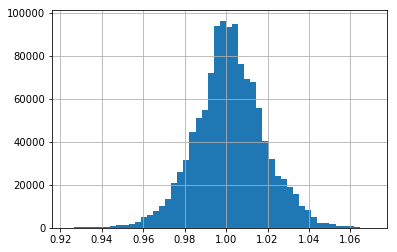

In [314]:
answer.hist(bins=50)

In [377]:
for s in range(1, 5):
    slide = s * 10000
    rolling = price.rolling(slide)
    data_f['mean_%d' % s] = rolling.mean() / price
    data_f['std_%d' % s] = rolling.std() / price
    data_f['max_%d' % s] = rolling.max() / price
    data_f['min_%d' % s] = rolling.min() / price
    data_f['med_%d' % s] = rolling.median() / price
data_f

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,mean_3,std_3,max_3,min_3,med_3,mean_4,std_4,max_4,min_4,med_4
id,,,,,,,,,,,,,,,,,,,,,
64173711,767005,0.002000,2017-11-01 23:51:13.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173714,767209,0.015547,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173715,767214,0.065302,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173716,767215,1.119151,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173725,767215,0.100000,2017-11-01 23:51:15.497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173728,767215,0.362092,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173729,767215,1.100000,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173730,767264,0.015547,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173731,767314,0.015548,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
for s in range(1, 5):
    slide = s * 10000
    mean = price.rolling(slide).mean()
    data_f['rel_diff_%d' % s] = (price - mean) / price

In [381]:
data_f

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,med_3,mean_4,std_4,max_4,min_4,med_4,rel_diff_1,rel_diff_2,rel_diff_3,rel_diff_4
id,,,,,,,,,,,,,,,,,,,,,
64173711,767005,0.002000,2017-11-01 23:51:13.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173714,767209,0.015547,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173715,767214,0.065302,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173716,767215,1.119151,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173725,767215,0.100000,2017-11-01 23:51:15.497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173728,767215,0.362092,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173729,767215,1.100000,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173730,767264,0.015547,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173731,767314,0.015548,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
data_f[data_f.med_4_diff.notnull()]

AttributeError: 'DataFrame' object has no attribute 'med_4_diff'

In [382]:
ewma = pd.ewma(price, span=20000)
ewma

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20000,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


id
64173711    767005.000000
64173714    767107.005100
64173715    767142.673633
64173716    767160.757937
64173725    767171.608520
64173728    767178.842241
64173729    767184.009185
64173730    767194.011537
64173731    767207.348922
64173732    767227.923285
64173733    767244.847809
64173734    767266.122188
64173737    767265.497030
64173738    767250.523228
64173739    767237.479219
64173758    767253.899077
64173759    767268.387186
64173761    767253.853329
64173763    767266.820080
64173764    767284.195572
64173767    767304.682923
64173768    767323.307786
64173770    767340.313096
64173773    767352.605843
64173776    767363.915169
64173783    767383.365801
64173788    767377.084836
64173801    767390.313935
64173805    767402.630681
64173810    767419.233709
                ...      
70708638    770731.405380
70708639    770732.234798
70708640    770733.064233
70708641    770733.893485
70708652    770734.722555
70708653    770735.551641
70708655    770736.380644
70708656 

In [383]:
data_f['ewma'] = ewma / price

In [384]:
data_fd = data_f.loc[:, 'mean_1':'ewma']
data_fd = data_fd - data_fd.shift(1000)
data_fd

,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,max_2,min_2,med_2,...,mean_4,std_4,max_4,min_4,med_4,rel_diff_1,rel_diff_2,rel_diff_3,rel_diff_4,ewma
id,,,,,,,,,,,,,,,,,,,,,
64173711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
renamed = {name:(name + '_diff') for name in data_fd.columns}
renamed

{'ewma': 'ewma_diff',
 'max_1': 'max_1_diff',
 'max_2': 'max_2_diff',
 'max_3': 'max_3_diff',
 'max_4': 'max_4_diff',
 'mean_1': 'mean_1_diff',
 'mean_2': 'mean_2_diff',
 'mean_3': 'mean_3_diff',
 'mean_4': 'mean_4_diff',
 'med_1': 'med_1_diff',
 'med_2': 'med_2_diff',
 'med_3': 'med_3_diff',
 'med_4': 'med_4_diff',
 'min_1': 'min_1_diff',
 'min_2': 'min_2_diff',
 'min_3': 'min_3_diff',
 'min_4': 'min_4_diff',
 'rel_diff_1': 'rel_diff_1_diff',
 'rel_diff_2': 'rel_diff_2_diff',
 'rel_diff_3': 'rel_diff_3_diff',
 'rel_diff_4': 'rel_diff_4_diff',
 'std_1': 'std_1_diff',
 'std_2': 'std_2_diff',
 'std_3': 'std_3_diff',
 'std_4': 'std_4_diff'}

In [386]:
data_fd = data_fd.rename(columns=renamed)
data_fd

,mean_1_diff,std_1_diff,max_1_diff,min_1_diff,med_1_diff,mean_2_diff,std_2_diff,max_2_diff,min_2_diff,med_2_diff,...,mean_4_diff,std_4_diff,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff
id,,,,,,,,,,,,,,,,,,,,,
64173711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [387]:
data_f = pd.concat([data_f, data_fd], axis=1)
data_f

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,mean_4_diff,std_4_diff,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff
id,,,,,,,,,,,,,,,,,,,,,
64173711,767005,0.002000,2017-11-01 23:51:13.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173714,767209,0.015547,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173715,767214,0.065302,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173716,767215,1.119151,2017-11-01 23:51:14.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173725,767215,0.100000,2017-11-01 23:51:15.497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173728,767215,0.362092,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173729,767215,1.100000,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173730,767264,0.015547,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64173731,767314,0.015548,2017-11-01 23:51:17.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
data_size = data_f.loc[:, 'mean_1':'ewma_diff'].shape
data_size

(1196111, 50)

In [389]:
data_f['ans'] = (1 - answer) * 100
df = data_f[data_f.med_4_diff.notnull() & data_f.ans.notnull()].sample(10000)
d_exp = df.loc[:, 'mean_1':'ewma_diff']
d_obj = df[['ans']]

In [390]:
df

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,std_4_diff,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff,ans
id,,,,,,,,,,,,,,,,,,,,,
66368287,830628,0.010000,2017-11-06 21:14:43.363,0.997770,0.005349,1.011282,0.987205,0.997937,1.005010,0.009241,...,2.021572e-04,0.004700,0.004476,0.003976,-0.004609,-0.003226,-0.004042,-0.004208,0.004332,1.474427
66854245,836913,0.027394,2017-11-08 03:29:45.093,0.993354,0.007683,1.003347,0.973938,0.996902,0.982093,0.012823,...,2.534732e-04,-0.000498,-0.000477,-0.000483,-0.002019,-0.000839,-0.000598,0.000338,0.000876,-0.392753
68908220,692000,0.010000,2017-11-12 03:24:50.530,1.021263,0.007896,1.036241,1.000000,1.021884,1.028985,0.010671,...,1.178275e-03,0.010672,0.000000,0.010174,-0.007581,-0.007900,-0.009289,-0.009642,0.008003,0.682514
68424652,760161,0.100000,2017-11-11 07:31:43.193,1.010500,0.004763,1.022706,0.999788,1.009799,1.010660,0.005323,...,-3.744503e-04,0.009138,0.015590,0.010142,-0.009136,-0.009064,-0.009481,-0.009723,0.008836,0.740764
67095566,847860,0.720000,2017-11-08 16:03:35.760,1.000543,0.002721,1.006061,0.992947,1.000939,0.998871,0.004778,...,-2.543769e-06,0.002975,0.002892,0.003402,-0.003065,-0.003504,-0.003338,-0.003360,0.003285,-2.375392
68923419,680418,0.280000,2017-11-12 03:42:20.470,1.026442,0.015369,1.050825,0.999224,1.029839,1.037672,0.016358,...,1.802617e-03,0.004416,0.001648,0.003790,-0.000541,-0.001287,-0.002360,-0.002979,0.000863,0.061433
64584247,806390,0.400350,2017-11-02 14:48:58.403,1.012543,0.006378,1.024641,0.994556,1.012825,0.999685,0.015996,...,1.183130e-04,0.007787,0.006844,0.006028,-0.008018,-0.008605,-0.006811,-0.006921,0.007172,0.131450
68825383,722850,0.064697,2017-11-11 23:53:56.610,1.001691,0.008108,1.020184,0.983755,1.002117,1.000152,0.008662,...,-9.000749e-04,-0.002091,0.001434,-0.001856,0.001507,0.001988,0.002284,0.001379,-0.002108,2.224251
67371754,846921,0.561108,2017-11-09 04:14:01.253,1.003753,0.002961,1.010955,0.997280,1.004091,1.005602,0.004375,...,-5.290016e-04,-0.008732,0.000645,0.000494,-0.000270,-0.001011,-0.001039,-0.000184,0.000428,-0.599466


In [353]:
model = pd.ols(y=df['ans'], x=df.loc[:, 'mean_1':'ewma_diff'])
model

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\stats\ols.py:336: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self._var_beta_raw))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <mean_1> + <std_1> + <max_1> + <min_1> + <med_1> + <mean_2>
             + <std_2> + <max_2> + <min_2> + <med_2> + <mean_3> + <std_3> + <max_3>
             + <min_3> + <med_3> + <mean_4> + <std_4> + <max_4> + <min_4> + <med_4>
             + <rel_diff_1> + <rel_diff_2> + <rel_diff_3> + <rel_diff_4> + <ewma>
             + <mean_1_diff> + <std_1_diff> + <max_1_diff> + <min_1_diff>
             + <med_1_diff> + <mean_2_diff> + <std_2_diff> + <max_2_diff> + <min_2_diff>
             + <med_2_diff> + <mean_3_diff> + <std_3_diff> + <max_3_diff>
             + <min_3_diff> + <med_3_diff> + <mean_4_diff> + <std_4_diff>
             + <max_4_diff> + <min_4_diff> + <med_4_diff> + <rel_diff_1_diff>
             + <rel_diff_2_diff> + <rel_diff_3_diff> + <rel_diff_4_diff> + <ewma_diff>
             + <intercept>

Number of Observations:         10000
Number of Degrees of Freedom:   43

R-squared:      

In [354]:
model.summary_as_matrix

,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,max_2,min_2,med_2,...,std_4_diff,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff,intercept
beta,1.0283,-1.139300e+02,7.113636e+01,-5.627717,-34.107708,158.247628,-34.345477,-44.458349,-1.245822e+02,-1.038641e+02,...,-97.829621,-17.417565,-3.211443,22.761708,-1.208757e+01,157.16391,-1.699183e+02,158.149881,251.446529,27.412004
p-value,NaN,7.441827e-07,7.686745e-10,0.634014,0.034055,NaN,0.071938,0.000009,2.315309e-34,3.048362e-16,...,0.163948,0.151220,0.788116,0.281305,9.999996e-01,NaN,9.999978e-01,NaN,0.031579,0.999948
std err,NaN,2.300391e+01,1.155323e+01,11.820463,16.090686,NaN,19.083950,10.033849,1.015317e+01,1.268907e+01,...,70.278939,12.134743,11.948895,21.125503,2.641833e+07,NaN,6.154758e+07,NaN,116.952013,422454.754744
t-stat,NaN,-4.952634e+00,6.157268e+00,-0.476100,-2.119717,NaN,-1.799705,-4.430837,-1.227027e+01,-8.185323e+00,...,-1.392019,-1.435347,-0.268765,1.077452,-4.575449e-07,NaN,-2.760763e-06,NaN,2.149997,0.000065


In [391]:
model_coef = model.summary_as_matrix.loc['beta', 'mean_1':'ewma_diff']
dfs = df.loc[:, 'mean_1':'ewma_diff']
dfe = df
dfe['reg'] = (dfs * model_coef).sum(axis=1)
dfe['reg'] = dfe.reg - dfe.reg.mean()
dfe

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff,ans,reg
id,,,,,,,,,,,,,,,,,,,,,
66368287,830628,0.010000,2017-11-06 21:14:43.363,0.997770,0.005349,1.011282,0.987205,0.997937,1.005010,0.009241,...,0.004700,0.004476,0.003976,-0.004609,-0.003226,-0.004042,-0.004208,0.004332,1.474427,0.149176
66854245,836913,0.027394,2017-11-08 03:29:45.093,0.993354,0.007683,1.003347,0.973938,0.996902,0.982093,0.012823,...,-0.000498,-0.000477,-0.000483,-0.002019,-0.000839,-0.000598,0.000338,0.000876,-0.392753,1.462171
68908220,692000,0.010000,2017-11-12 03:24:50.530,1.021263,0.007896,1.036241,1.000000,1.021884,1.028985,0.010671,...,0.010672,0.000000,0.010174,-0.007581,-0.007900,-0.009289,-0.009642,0.008003,0.682514,-0.195953
68424652,760161,0.100000,2017-11-11 07:31:43.193,1.010500,0.004763,1.022706,0.999788,1.009799,1.010660,0.005323,...,0.009138,0.015590,0.010142,-0.009136,-0.009064,-0.009481,-0.009723,0.008836,0.740764,-0.338215
67095566,847860,0.720000,2017-11-08 16:03:35.760,1.000543,0.002721,1.006061,0.992947,1.000939,0.998871,0.004778,...,0.002975,0.002892,0.003402,-0.003065,-0.003504,-0.003338,-0.003360,0.003285,-2.375392,0.672423
68923419,680418,0.280000,2017-11-12 03:42:20.470,1.026442,0.015369,1.050825,0.999224,1.029839,1.037672,0.016358,...,0.004416,0.001648,0.003790,-0.000541,-0.001287,-0.002360,-0.002979,0.000863,0.061433,-1.162877
64584247,806390,0.400350,2017-11-02 14:48:58.403,1.012543,0.006378,1.024641,0.994556,1.012825,0.999685,0.015996,...,0.007787,0.006844,0.006028,-0.008018,-0.008605,-0.006811,-0.006921,0.007172,0.131450,-2.692753
68825383,722850,0.064697,2017-11-11 23:53:56.610,1.001691,0.008108,1.020184,0.983755,1.002117,1.000152,0.008662,...,-0.002091,0.001434,-0.001856,0.001507,0.001988,0.002284,0.001379,-0.002108,2.224251,0.445293
67371754,846921,0.561108,2017-11-09 04:14:01.253,1.003753,0.002961,1.010955,0.997280,1.004091,1.005602,0.004375,...,-0.008732,0.000645,0.000494,-0.000270,-0.001011,-0.001039,-0.000184,0.000428,-0.599466,0.169436


In [392]:
sig = dfe.ans * dfe.reg
sig[sig > 0].size

5061

In [394]:
from matplotlib import pyplot as plt
%matplotlib inline
for label in df.loc[:, 'mean_1':'ewma_diff'].columns:
    df.plot.scatter(label, 'ans')
    plt.clf()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [317]:
from scipy.stats import pearsonr
lis = []
for label in df.loc[:, 'mean_1':'ewma_diff'].columns:
    r, p = pearsonr(df[label], df.ans)
    lis.append({
        'label': label,
        'rel': r,
        'p_val': p,
    })
rels = pd.DataFrame(lis)
rels

,label,p_val,rel
0,mean_1,1.200796e-03,0.032382
1,std_1,4.393547e-02,0.020148
2,max_1,3.369836e-05,0.041457
3,min_1,4.128342e-02,0.020407
4,med_1,2.860455e-03,0.029821
5,mean_2,1.482346e-01,0.014459
6,std_2,4.254202e-03,-0.028584
7,max_2,2.156748e-02,0.022979
8,min_2,1.217491e-02,0.025070
9,med_2,7.840539e-02,0.017601


In [318]:
rels['rel_abs'] = rels.rel.abs()
rels[rels.p_val < 0.05].sort_values(by='rel_abs', ascending=False)

,label,p_val,rel,rel_abs
16,std_4,3.921944e-51,0.149587,0.149587
17,max_4,5.951801e-22,0.096093,0.096093
36,std_3_diff,1.745246e-13,-0.073579,0.073579
12,max_3,8.312043e-08,0.053570,0.053570
18,min_4,1.183694e-07,-0.052929,0.052929
11,std_3,4.791032e-07,0.050319,0.050319
26,std_1_diff,3.605886e-06,0.046310,0.046310
2,max_1,3.369836e-05,0.041457,0.041457
42,max_4_diff,5.531880e-05,0.040308,0.040308
27,max_1_diff,7.154246e-05,0.039700,0.039700


In [279]:
d_obj['small'] = d_obj.ans <= 0.99
d_obj['large'] = d_obj.ans >= 1.01
d_obj['val'] = d_obj['small'] * 1 + d_obj['large'] * 2
d_obj = d_obj[['val']]
d_obj

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,val
id,
60548801,1
60385924,2
63784101,2
59767464,0
63582372,0
59274947,1
63630935,0
59129095,0
61030205,0


In [280]:
data = np.array(d_exp, dtype=np.float32)
f_names = np.array(d_exp.columns)
t_data = np.array(d_obj.val, dtype=np.int32)
t_names = np.array(['non', 'down', 'up'])

In [199]:
t_data.shape, data.shape

((10000,), (10000, 50))

In [281]:
row, col = data_size

ls_1 = 500
ls_2 = 1000
ls_3 = 200
out_size = 3
class MyChain(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
            l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_3, out_size)
        )
    
    def __call__(self, x):
        h1 = F.sigmoid(self.l1(x))
        h2 = F.sigmoid(self.l2(h1))
        h3 = F.sigmoid(self.l3(h2))
        o = self.l4(h3)
        return o

In [282]:
train = datasets.tuple_dataset.TupleDataset(data, t_data)
train = iterators.SerialIterator(train, batch_size=100, shuffle=True, repeat=True)

In [283]:
model = L.Classifier(MyChain())
optimizer = optimizers.SGD()
optimizer.setup(model)
updater = training.StandardUpdater(train, optimizer)

In [148]:
trainer = training.Trainer(updater, (10, 'epoch'), out='result')
#精度確認
# trainer.extend(extensions.Evaluator(test_iter, model))
#レポート出力
trainer.extend(extensions.LogReport())
#レポート内容
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy']))
#プログレスバー出力
trainer.extend(extensions.ProgressBar())
#モデルの保存
# trainer.extend(extensions.snapshot(trigger=(1, 'epoch'), filename='snapshot_iter_{0:04d}'))

In [150]:
!pip install chaineripy

In [151]:
from chaineripy.extensions import PrintReport, ProgressBar

In [285]:
trainer = training.Trainer(updater, (30, 'epoch'), out='result')
#精度確認
# trainer.extend(extensions.Evaluator(test_iter, model))
#レポート出力
trainer.extend(extensions.LogReport())
# print the statistics to a IPython widget
trainer.extend(PrintReport(
    ['epoch', 'main/loss', 'validation/main/loss',
     'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))
# show the progress bar on a IPython widget
trainer.extend(ProgressBar(update_interval=10))

In [286]:
trainer.run()

In [204]:
trainer.run()

In [161]:
serializers.save_npz('model_02.npz', model)

In [319]:
data_f['ans'] = (answer - 1) * 100
df = data_f[data_f.med_4_diff.notnull() & data_f.ans.notnull()].sample(10000)
d_exp = df.loc[:, 'mean_1':'ewma_diff']
d_obj = df[['ans']]
data = np.array(d_exp, dtype=np.float32)
f_names = np.array(d_exp.columns)
t_data = np.array(d_obj, dtype=np.float32)
t_names = np.array(['non', 'down', 'up'])
data_size = d_exp.shape

In [320]:
row, col = data_size

ls_1 = 500
ls_2 = 1000
ls_3 = 200
out_size = 1
class MyChainR(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
            l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_3, out_size)
        )
    
    def __call__(self, *args):
        o = self.forward(args[0])
        t = args[1]
        self.loss = F.mean_squared_error(o, t)
        report({'loss': self.loss}, self)
        return self.loss
    
    def forward(self, x):
        h1 = F.sigmoid(self.l1(x))
        h2 = F.sigmoid(self.l2(h1))
        h3 = F.sigmoid(self.l3(h2))
        return self.l4(h3)

In [322]:
train = datasets.tuple_dataset.TupleDataset(data, t_data)
train = iterators.SerialIterator(train, batch_size=100, shuffle=True, repeat=True)
model = MyChainR()
optimizer = optimizers.SGD()
optimizer.setup(model)
updater = training.StandardUpdater(train, optimizer)

trainer = training.Trainer(updater, (30, 'epoch'), out='result')
#精度確認
# trainer.extend(extensions.Evaluator(test_iter, model))
#レポート出力
trainer.extend(extensions.LogReport())
# print the statistics to a IPython widget
trainer.extend(PrintReport(
    ['epoch', 'main/loss', 'validation/main/loss',
     'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))
# show the progress bar on a IPython widget
trainer.extend(ProgressBar(update_interval=10))

In [323]:
trainer.run()

In [360]:
df = data_f[data_f.med_4_diff.notnull() & data_f.ans.notnull()].sample(100)
d_exp = df.loc[:, 'mean_1':'ewma_diff']
d_obj = df[['ans']]
data = np.array(d_exp, dtype=np.float32)
t_data = np.array(d_obj, dtype=np.float32)

In [361]:
df

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,std_4_diff,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff,ans
id,,,,,,,,,,,,,,,,,,,,,
62715709,648489,0.448400,2017-10-29 03:06:36.823,0.997173,0.002956,1.005645,0.991038,0.996904,0.995720,0.003734,...,-0.000166,-0.005033,-0.004825,-0.005940,0.004378,0.004936,5.159480e-03,0.005310,-0.004944,-0.575492
57137410,631500,0.010000,2017-10-13 13:39:07.980,0.999243,0.004432,1.009501,0.987865,0.999840,1.004156,0.006541,...,-0.000104,0.001608,0.001514,0.001052,-0.001361,-0.001386,-1.435413e-03,-0.001265,0.001766,-2.110055
62151354,662474,0.022000,2017-10-27 07:30:11.333,1.001490,0.006383,1.013985,0.987405,1.001728,1.007944,0.008444,...,-0.000044,-0.000008,-0.000007,-0.001036,0.001084,0.000486,6.212539e-07,0.000334,-0.000257,0.119854
59892817,692698,0.300000,2017-10-21 12:52:14.377,1.000409,0.002303,1.006571,0.994993,1.000303,0.999819,0.003000,...,-0.000681,0.003694,0.006490,0.003886,-0.003593,-0.003289,-3.543011e-03,-0.004333,0.003718,1.737698
61712362,646650,1.000000,2017-10-26 03:23:42.710,0.994745,0.003407,1.001931,0.983111,0.994660,0.986678,0.011220,...,0.000536,-0.000516,-0.001011,-0.000819,-0.000396,-0.001150,-2.764274e-04,0.000166,0.000273,-0.054125
57119912,626210,0.764026,2017-10-13 12:57:07.963,1.010837,0.006285,1.025215,0.996211,1.010207,1.012764,0.006786,...,0.000119,0.006756,0.006362,0.006161,-0.005141,-0.006775,-5.721804e-03,-0.006109,0.005695,-2.824931
57601681,635625,0.111000,2017-10-14 18:31:42.200,1.006553,0.002763,1.012311,0.996185,1.006883,1.004920,0.004538,...,-0.000108,0.007172,0.006947,0.007522,-0.006630,-0.007554,-7.446896e-03,-0.007385,0.006824,-1.883972
60880692,674449,0.002898,2017-10-23 23:41:48.403,0.993159,0.003201,1.002599,0.986970,0.993033,0.986959,0.008256,...,-0.000184,-0.007327,-0.006576,-0.006743,0.006204,0.005651,5.691201e-03,0.006804,-0.005800,4.683972
63211123,678000,0.010000,2017-10-30 12:36:15.230,1.016786,0.006869,1.027817,1.000000,1.018230,1.014547,0.005551,...,-0.000625,0.007540,0.014103,0.007426,-0.006140,-0.007131,-7.090444e-03,-0.007676,0.006249,0.170649


In [362]:
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <mean_1> + <std_1> + <max_1> + <min_1> + <med_1> + <mean_2>
             + <std_2> + <max_2> + <min_2> + <med_2> + <mean_3> + <std_3> + <max_3>
             + <min_3> + <med_3> + <mean_4> + <std_4> + <max_4> + <min_4> + <med_4>
             + <rel_diff_1> + <rel_diff_2> + <rel_diff_3> + <rel_diff_4> + <ewma>
             + <mean_1_diff> + <std_1_diff> + <max_1_diff> + <min_1_diff>
             + <med_1_diff> + <mean_2_diff> + <std_2_diff> + <max_2_diff> + <min_2_diff>
             + <med_2_diff> + <mean_3_diff> + <std_3_diff> + <max_3_diff>
             + <min_3_diff> + <med_3_diff> + <mean_4_diff> + <std_4_diff>
             + <max_4_diff> + <min_4_diff> + <med_4_diff> + <rel_diff_1_diff>
             + <rel_diff_2_diff> + <rel_diff_3_diff> + <rel_diff_4_diff> + <ewma_diff>
             + <intercept>

Number of Observations:         10000
Number of Degrees of Freedom:   43

R-squared:      

In [327]:
res = model.forward(data)
res

In [359]:
res.shape

(100, 1)

In [330]:
dfs = df
dfs['res'] = res.data
dfs

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff,ans,res
id,,,,,,,,,,,,,,,,,,,,,
60471000,687601,0.100000,2017-10-23 01:59:21.040,0.988768,0.005187,1.000580,0.975420,0.988250,0.983430,0.007710,...,0.000131,-0.002228,-0.000613,0.000011,0.001593,0.001436,0.001683,-0.000875,-0.232839,0.195784
62955796,681095,1.589840,2017-10-29 20:04:14.470,0.982806,0.007202,1.002944,0.967034,0.981417,0.972751,0.011451,...,0.001920,-0.004800,-0.005607,0.003009,0.004266,0.004679,0.004915,-0.003923,1.067839,0.195717
60802420,665541,0.018300,2017-10-23 17:29:39.893,0.985329,0.008717,1.004476,0.970639,0.985364,0.984021,0.007530,...,-0.000824,-0.000784,-0.000807,-0.001587,0.000566,0.000860,0.001193,0.000427,1.032093,0.195847
59235280,639506,0.475740,2017-10-19 14:24:31.903,0.997119,0.002607,1.001396,0.990221,0.997645,0.994327,0.004693,...,-0.000152,-0.000161,0.000204,0.000117,-0.000768,-0.000234,-0.000251,0.000360,-0.626421,0.195794
62477953,656720,2.400001,2017-10-28 05:46:55.583,0.997883,0.006299,1.012989,0.987255,0.995529,0.996105,0.006038,...,-0.004414,-0.004266,-0.004387,0.005049,0.003757,0.004059,0.004585,-0.004317,-1.856194,0.195792
62112457,666250,0.007200,2017-10-27 05:47:03.250,1.006670,0.004320,1.015385,0.997202,1.006817,1.003136,0.008054,...,-0.001557,-0.000812,-0.001213,0.001969,-0.000062,0.001071,0.001083,-0.000999,0.712946,0.195810
59135245,633216,0.149100,2017-10-19 09:01:54.923,0.998414,0.004162,1.004981,0.987295,0.999300,0.999074,0.004053,...,0.002029,0.001924,0.002609,-0.001688,-0.002230,-0.002625,-0.002928,0.002486,0.437292,0.195851
57440808,630818,0.079955,2017-10-14 09:10:57.643,1.000517,0.003360,1.008879,0.992291,1.000606,1.001789,0.005830,...,0.003759,0.005222,0.005273,-0.005122,-0.005566,-0.005802,-0.004833,0.005438,0.867128,0.195873
59822283,693682,0.252200,2017-10-21 07:57:25.377,0.998145,0.003869,1.007955,0.987873,0.998295,1.001552,0.004680,...,-0.002687,-0.002566,-0.001414,0.003223,0.002890,0.001665,0.001916,-0.002308,-0.170107,0.195822


In [331]:
df[df['ans'] > 0].shape

(59, 55)

In [332]:
(df.ans - df.res).abs()

id
60471000    0.428622
62955796    0.872122
60802420    0.836246
59235280    0.822215
62477953    2.051987
62112457    0.517136
59135245    0.241441
57440808    0.671256
59822283    0.365928
61510049    0.690171
59546957    1.203223
58932380    1.802174
58492570    1.201553
63762022    0.112537
62248657    0.016364
61510861    0.805634
62490001    2.679399
62414193    0.588471
62791582    0.764887
63360861    1.245560
58340579    0.271628
59711524    0.258686
63383739    0.256600
62021102    0.060813
59032680    0.148321
60339540    2.545535
61824238    2.613739
63518371    1.765141
59616083    0.523732
62728015    0.382150
              ...   
57823607    1.597233
60891777    4.293572
58833497    1.835899
60816704    1.347762
57925569    1.150571
57285075    1.373554
60171332    0.062476
63003868    0.374861
57406935    1.510369
63616495    0.344863
57554848    0.305919
60224831    0.434835
57797232    1.899255
63762373    0.412836
59650028    0.999520
58868441    4.265515
57628941  